In [5]:
# Editing mode
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib as plt
import networkx as nx
import random
from scipy.stats import pearsonr
import GRNgene as gg
random.seed(1)

# GRNgene

## Generate and save

In [32]:
# #Reference one for paper 
# LFR_params = dict(
#     n=1564,
#     tau1=2.29,
#     tau2=1.9,
#     mu=0.15,
#     average_degree=4.4,
#     min_community=10,
#     max_community=300,
#     seed=3 # Set seed for reproducibility
# )


LFR_params = dict(
    n=1564,
    tau1=2.3,
    tau2=2.5,
    mu=0.1,
    average_degree=4.5,
    min_community=10,
    max_community=300,
    seed=0 # Set seed for reproducibility
) # 2600 noeuds


hub_bias = 3.0

# Generate LFR graph with retry loop to 1 since we set the seed
G_lfr = gg.LFRAlgorithm(max_retries=1,**LFR_params)

# Apply direction assignment
G_lfr_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_lfr,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)
#nx.write_adjlist(G_lfr_directed, "g_lfr_directed_final_2600.adjlist") # random

Removed 89 self-loops from the graph.
Graph is disconnected. Connecting components...
Connected node 0 (deg=3) with 1 (deg=1)
Connected node 0 (deg=4) with 891 (deg=114)
Connected node 384 (deg=39) with 1469 (deg=3)
Connected node 1468 (deg=101) with 152 (deg=3)
Connected node 396 (deg=113) with 1269 (deg=6)
Connected node 891 (deg=115) with 18 (deg=2)
Connected node 750 (deg=57) with 363 (deg=2)
Connected node 1075 (deg=118) with 405 (deg=3)
Connected node 891 (deg=116) with 633 (deg=4)
Connected node 891 (deg=117) with 491 (deg=5)
Connected node 1075 (deg=119) with 49 (deg=1)
Connected node 1468 (deg=102) with 52 (deg=2)
Connected node 396 (deg=114) with 58 (deg=2)
Connected node 891 (deg=118) with 1030 (deg=4)
Connected node 1075 (deg=120) with 305 (deg=3)
Connected node 891 (deg=119) with 617 (deg=2)
Connected node 1075 (deg=121) with 662 (deg=4)
Connected node 1075 (deg=122) with 120 (deg=2)
Connected node 396 (deg=115) with 128 (deg=3)
Connected node 645 (deg=28) with 1156 (deg=2

## Load

In [7]:
G_lfr_directed=nx.read_adjlist("figures/g_lfr_directed_final_2600.adjlist", create_using=nx.DiGraph())
lfr_adj_mx = nx.adjacency_matrix(G_lfr_directed)
print(G_lfr_directed.number_of_edges())
print(G_lfr_directed.number_of_nodes())

2602
1564


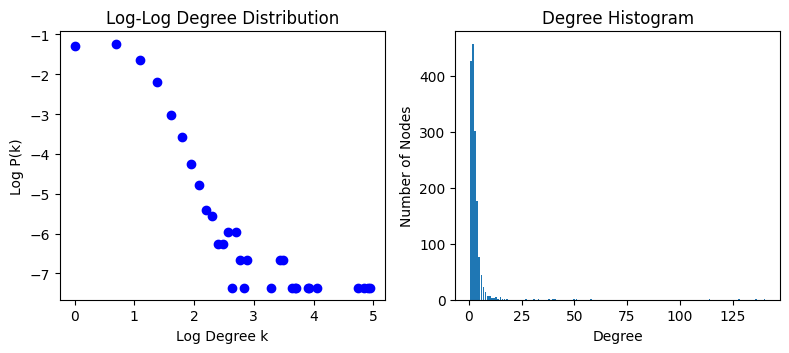

In [9]:
lfr_adj_mx = nx.adjacency_matrix(G_lfr_directed)
gg.plot_grn_degree(G_lfr_directed, plot_network=False)
# lfr_properties = gg.network_properties(G_lfr_directed)
# print(lfr_properties)

In [4]:
lfr_adj_mx = nx.adjacency_matrix(G_lfr_directed)
plot_grn_degree(lfr_adj_mx, plot_network=False)
lfr_properties = graph_properties(lfr_adj_mx)
print(G_lfr_directed.number_of_edges())

NameError: name 'plot_grn_degree' is not defined

# E Coli

In [11]:
filepath = '../../data/gnw/Ecoli-full.tsv'
adj_mx = gg.adj_mx_gnw_goldstandard(filepath)
ecoli_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph())

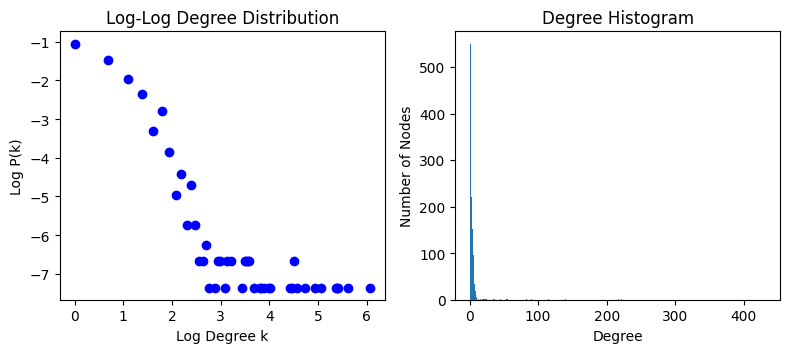

In [14]:
gg.plot_grn_degree(ecoli_grn, plot_network=False)
gnw_properties = gg.network_properties(ecoli_grn)

# Comparison

## Motif distribution (log)

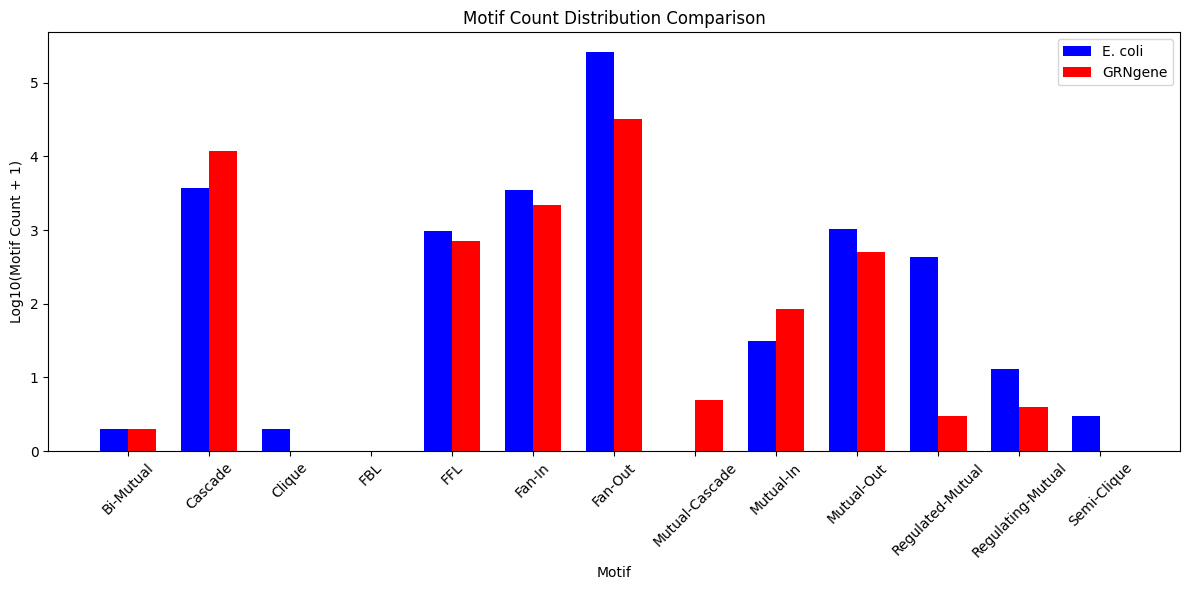

In [16]:
gg.compare_motif_dist(ecoli_grn, G_lfr_directed, "E. coli", "GRNgene")#, save_filename='motif_distribution.eps')

## Motif distribution correlation

In [17]:
pearson_corr, pearson_p, spearman_corr, spearman_p = gg.correlation_metrics(ecoli_grn, G_lfr_directed)

print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.5f})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.5f})")

Pearson correlation: 0.850 (p=0.00023)
Spearman correlation: 0.938 (p=0.00000)


In [19]:
network1_motifs = subgraph3N(ecoli_grn)
network1_motifs_count = gg.get_all_motifs_count(network1_motifs)

network2_motifs = subgraph3N(G_lfr_directed)
network2_motifs_count = gg.get_all_motifs_count(network2_motifs)

# Ensure both have the same motif keys
all_motifs = set(network2_motifs_count.keys()).union(network1_motifs_count.keys())

motifs = sorted(all_motifs)
counts_network1 = [network1_motifs_count.get(m, 0) for m in motifs]
counts_network2 = [network2_motifs_count.get(m, 0) for m in motifs]

# Convert counts to log-scale (add +1 to avoid log(0))
log_counts_network1 = [np.log10(c + 1) for c in counts_network1]
log_counts_network2 = [np.log10(c + 1) for c in counts_network2]

corr, p_corr = pearsonr(log_counts_network1, log_counts_network2)
print(f"Pearson correlation: {corr:.3f} (p={p_corr:.5f})")

Pearson correlation: 0.910 (p=0.00002)


## Degree distribution

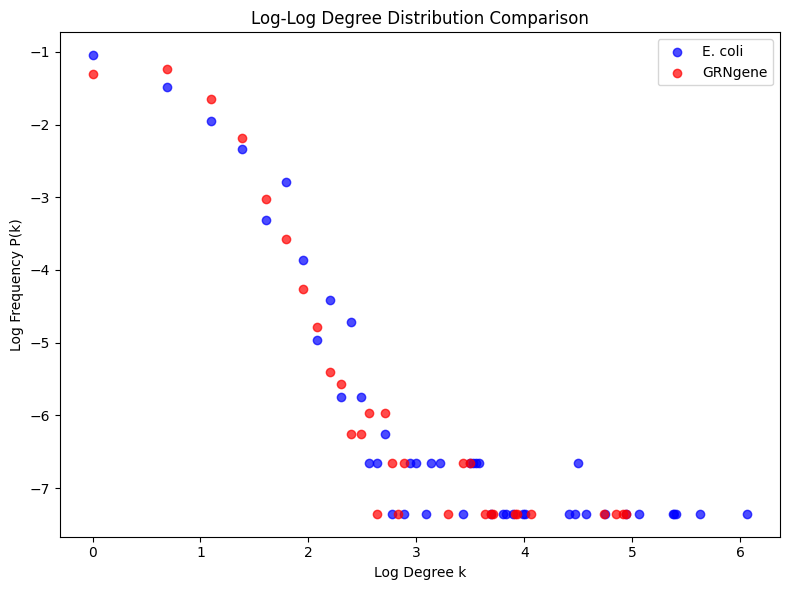

In [21]:
# Plot degree distribution comparison
gg.compare_degree_distribution(ecoli_grn, G_lfr_directed, label1="E. coli", label2="GRNgene", save_path=None)

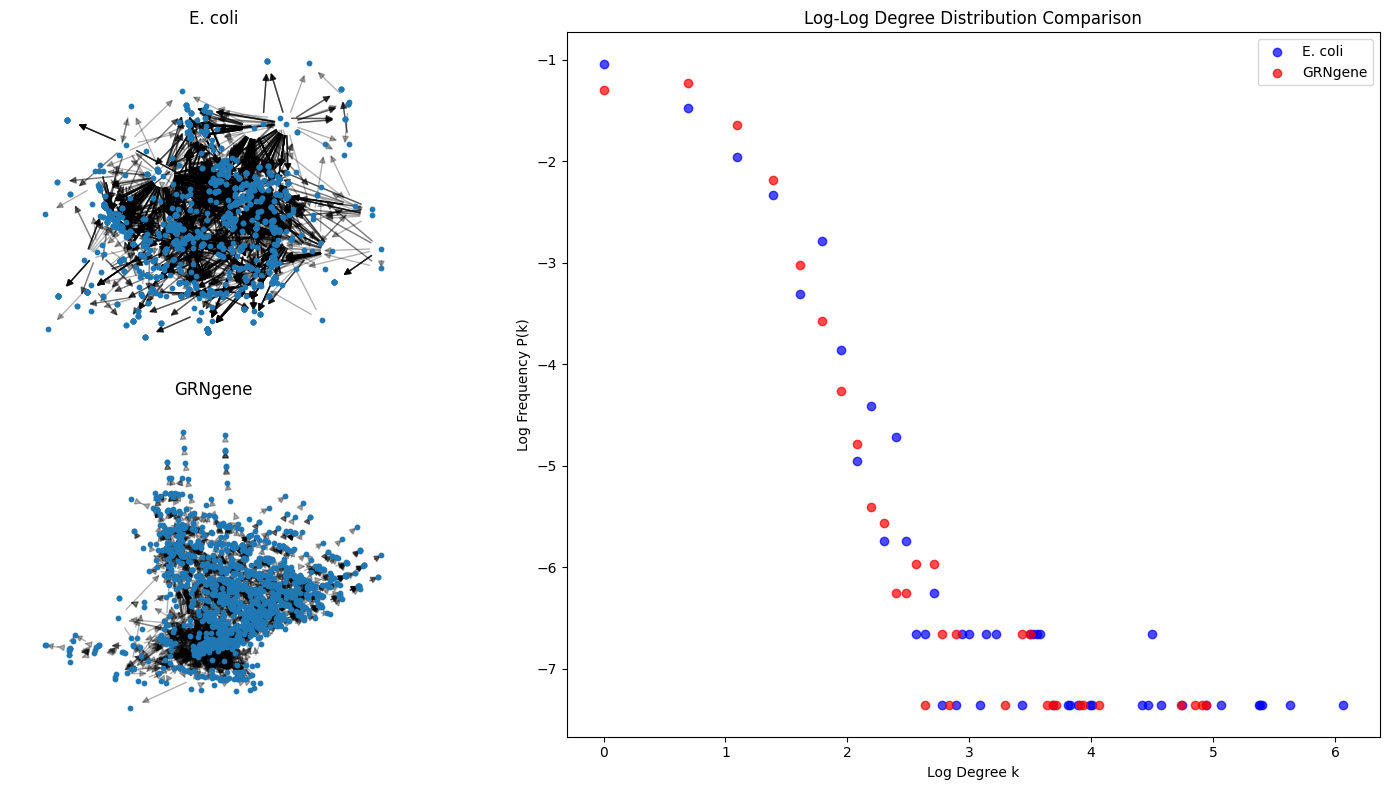

In [22]:
# Call the comparison plot
gg.plot_degree_network(
    ecoli_grn,
    G_lfr_directed,
    label1="E. coli",
    label2="GRNgene",
    #save_path="figures/networks_degree_kamada.eps",
    plot_fit=False
)


# Multiple simulation

## Motif distribution stable

Successfully generated LFR graph on attempt 1.
Connected node 0 (deg=3) with 1 (deg=3)
Connected node 0 (deg=4) with 396 (deg=115)
Connected node 891 (deg=114) with 5 (deg=3)
Connected node 1075 (deg=118) with 152 (deg=3)
Connected node 396 (deg=116) with 714 (deg=4)
Connected node 396 (deg=117) with 18 (deg=2)
Connected node 1468 (deg=101) with 363 (deg=2)
Connected node 891 (deg=115) with 1434 (deg=3)
Connected node 1075 (deg=119) with 633 (deg=4)
Connected node 396 (deg=118) with 245 (deg=5)
Connected node 1075 (deg=120) with 49 (deg=3)
Connected node 750 (deg=57) with 52 (deg=2)
Connected node 1075 (deg=121) with 223 (deg=2)
Connected node 932 (deg=48) with 1030 (deg=4)
Connected node 396 (deg=119) with 1270 (deg=4)
Connected node 396 (deg=120) with 104 (deg=4)
Connected node 891 (deg=116) with 192 (deg=4)
Connected node 396 (deg=121) with 120 (deg=2)
Connected node 1075 (deg=122) with 128 (deg=3)
Connected node 932 (deg=49) with 135 (deg=2)
Connected node 396 (deg=122) with 149 (d

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Finished all simulations.


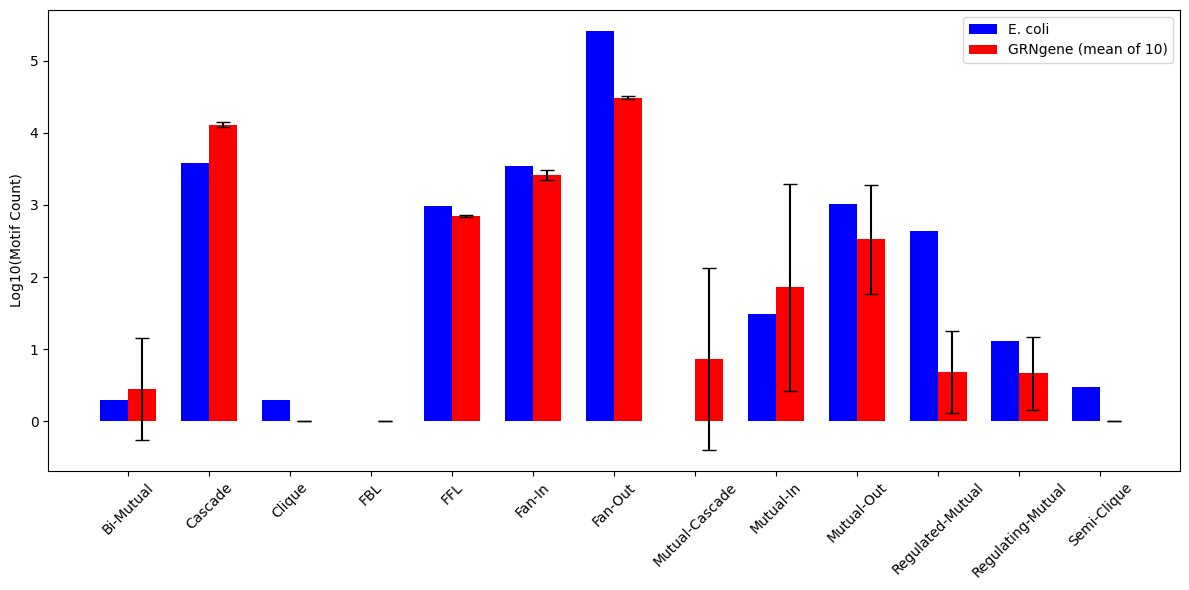

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

 
#Reference one for paper 
LFR_params = dict(
    n=1564,
    tau1=2.3,
    tau2=2.5,
    mu=0.1,
    average_degree=4.5,
    min_community=10,
    max_community=300,
    seed=0 # Set seed for reproducibility
    hub_bias=3
)

n_simulations = 10

# Prepare motif counts storage
motifs_list = []
counts_lfr_all = []

# Get E. coli motif counts
filepath = '../../data/gnw/Ecoli-full.tsv'
adj_mx = gg.adj_mx_gnw_goldstandard(filepath)
known_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph)
ecoli_motifs = subgraph3N(known_grn)
ecoli_motifs_count = gg.get_all_motifs_count(ecoli_motifs)

# First, collect the set of motifs (from E. coli)
all_motifs = set(ecoli_motifs_count.keys())

# --- Run multiple simulations ---
for i in range(n_simulations):
    # Generate a new LFR network
    G_lfr, attempts = gg.LFRAlgorithm(max_retries=10, **LFR_params)

    if not nx.is_connected(G_lfr):
        G_lfr = connect_components_by_degree(G_lfr, hub_bias=hub_bias)
    else:
        print(f"Sim {i+1}: LFR graph already connected.")

    G_lfr_directed = adjacenteDiMatriceStaredFromGraph(
        G_lfr,
        autoRG=0.0,
        duoRG=0.005
    )

    # Extract motifs
    lfr_motifs = subgraph3N(G_lfr_directed)
    motifs_count = get_all_motifs_count(lfr_motifs)

    # Update motif set to include any new motifs found
    all_motifs.update(motifs_count.keys()) # not necessary since i have listed all combination

    counts_this_sim = [motifs_count.get(m, 0) for m in sorted(all_motifs)]
    counts_lfr_all.append(counts_this_sim)

print("Finished all simulations.")

# --- Process results ---
motifs = sorted(all_motifs)
counts_ecoli = [ecoli_motifs_count.get(m, 0) for m in motifs]

# Align all simulations to the same motif order and pad missing motifs with 0
counts_lfr_all_aligned = []
for sim_counts in counts_lfr_all:
    motif_dict = dict(zip(motifs, sim_counts))
    aligned = [motif_dict.get(m, 0) for m in motifs]
    counts_lfr_all_aligned.append(aligned)

counts_lfr_all_arr = np.array(counts_lfr_all_aligned)

# Compute mean and standard deviation across simulations
mean_counts_lfr = np.mean(counts_lfr_all_arr, axis=0)
std_counts_lfr = np.std(counts_lfr_all_arr, axis=0)

# Convert to log-scale (add +1 to avoid log(0))
log_counts_ecoli = [np.log10(c + 1) for c in counts_ecoli]
log_mean_counts_lfr = np.log10(mean_counts_lfr + 1)
log_std_counts_lfr = (np.log10(mean_counts_lfr + std_counts_lfr + 1) -
                      np.log10(np.maximum(mean_counts_lfr - std_counts_lfr, 0) + 1))

# --- Plot ---
x = np.arange(len(motifs))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# E. coli bars
rects1 = ax.bar(x - width/2, log_counts_ecoli, width, label='E. coli', color='blue')

# Simulated mean bars with error bars
rects2 = ax.bar(x + width/2, log_mean_counts_lfr, width, label='GRNgene (mean of 10)', color='red',
                yerr=log_std_counts_lfr, capsize=5)

ax.set_ylabel('Log10(Motif Count)')
ax.set_xticks(x)
ax.set_xticklabels(motifs, rotation=45)
ax.legend()

plt.tight_layout()
fig.savefig('motif_distribution_mean_10.eps', format='eps')
plt.show()

Removed 86 self-loops from the graph.
Graph is disconnected. Connecting components...
Connected node 899 (deg=210) with 284 (deg=2)
Connected node 899 (deg=211) with 846 (deg=3)
Connected node 899 (deg=212) with 614 (deg=3)
Connected node 899 (deg=213) with 1109 (deg=5)
Connected node 899 (deg=214) with 1343 (deg=5)
Connected node 899 (deg=215) with 291 (deg=3)
Connected node 899 (deg=216) with 900 (deg=2)
Connected node 899 (deg=217) with 983 (deg=4)
Connected node 899 (deg=218) with 65 (deg=3)
Connected node 1047 (deg=29) with 92 (deg=1)
Connected node 899 (deg=219) with 729 (deg=3)
Connected node 1306 (deg=73) with 1264 (deg=4)
Connected node 899 (deg=220) with 111 (deg=1)
Connected node 899 (deg=221) with 260 (deg=4)
Connected node 694 (deg=69) with 751 (deg=3)
Connected node 899 (deg=222) with 149 (deg=1)
Connected node 899 (deg=223) with 153 (deg=1)
Connected node 899 (deg=224) with 188 (deg=2)
Connected node 300 (deg=92) with 207 (deg=1)
Connected node 899 (deg=225) with 212 (de

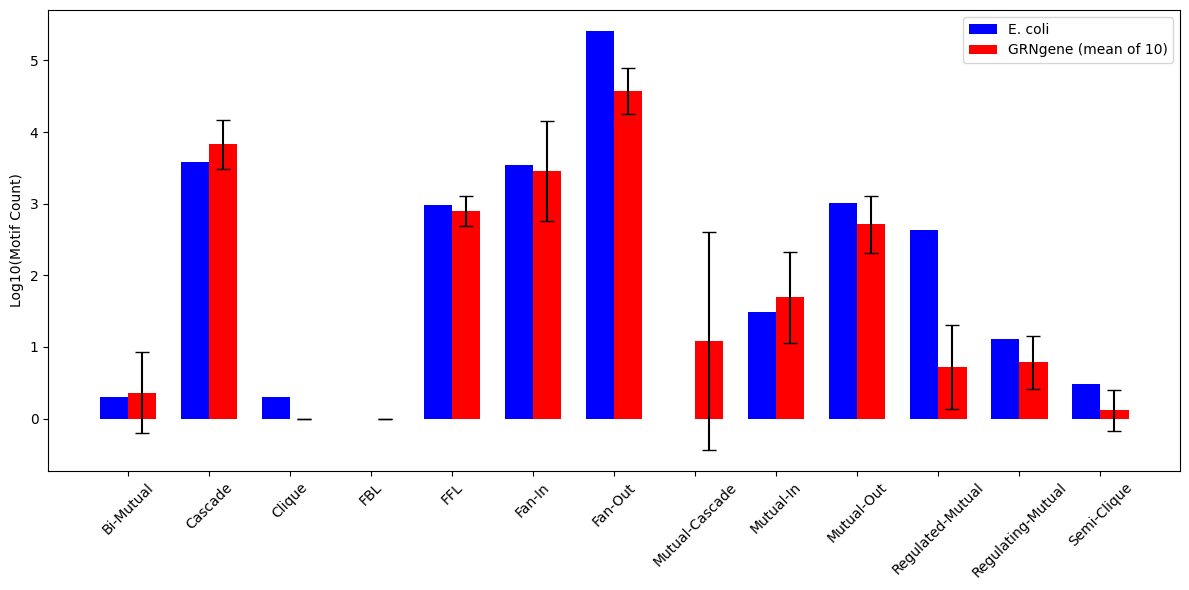

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

 
#Reference one for paper 
LFR_params = dict(
    n=1564,
    tau1=2.3,
    tau2=2.5,
    mu=0.1,
    average_degree=4.5,
    min_community=10,
    max_community=300,
    hub_bias=3
)

n_simulations = 10

# Prepare motif counts storage
motifs_list = []
counts_lfr_all = []

# Get E. coli motif counts
filepath = '../../data/gnw/Ecoli-full.tsv'
adj_mx = gg.adj_mx_gnw_goldstandard(filepath)
known_grn = nx.from_numpy_array(adj_mx, create_using=nx.DiGraph)
ecoli_motifs = subgraph3N(known_grn)
ecoli_motifs_count = gg.get_all_motifs_count(ecoli_motifs)

# First, collect the set of motifs (from E. coli)
all_motifs = set(ecoli_motifs_count.keys())

# --- Run multiple simulations ---
for i in range(n_simulations):
    # Generate a new LFR network
    G_lfr = gg.LFRAlgorithm(max_retries=10, **LFR_params)
    G_lfr_directed, _ = gg.adjacenteDiMatriceStaredFromGraph(
        G_lfr,
        autoRG=0.0,
        duoRG=0.005
    )

    # Extract motifs
    lfr_motifs = gg.subgraph3N(G_lfr_directed)
    motifs_count = gg.get_all_motifs_count(lfr_motifs)

    # Update motif set to include any new motifs found
    all_motifs.update(motifs_count.keys()) # shouldn't be necessary anymore since i have listed all combination

    counts_this_sim = [motifs_count.get(m, 0) for m in sorted(all_motifs)]
    counts_lfr_all.append(counts_this_sim)

print("Finished all simulations.")

# --- Process results ---
motifs = sorted(all_motifs)
counts_ecoli = [ecoli_motifs_count.get(m, 0) for m in motifs]

# Align all simulations to the same motif order and pad missing motifs with 0
counts_lfr_all_aligned = []
for sim_counts in counts_lfr_all:
    motif_dict = dict(zip(motifs, sim_counts))
    aligned = [motif_dict.get(m, 0) for m in motifs]
    counts_lfr_all_aligned.append(aligned)

counts_lfr_all_arr = np.array(counts_lfr_all_aligned)

# Compute mean and standard deviation across simulations
mean_counts_lfr = np.mean(counts_lfr_all_arr, axis=0)
std_counts_lfr = np.std(counts_lfr_all_arr, axis=0)

# Convert to log-scale (add +1 to avoid log(0))
log_counts_ecoli = [np.log10(c + 1) for c in counts_ecoli]
log_mean_counts_lfr = np.log10(mean_counts_lfr + 1)
log_std_counts_lfr = (np.log10(mean_counts_lfr + std_counts_lfr + 1) -
                      np.log10(np.maximum(mean_counts_lfr - std_counts_lfr, 0) + 1))

# --- Plot ---
x = np.arange(len(motifs))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# E. coli bars
rects1 = ax.bar(x - width/2, log_counts_ecoli, width, label='E. coli', color='blue')

# Simulated mean bars with error bars
rects2 = ax.bar(x + width/2, log_mean_counts_lfr, width, label='GRNgene (mean of 10)', color='red',
                yerr=log_std_counts_lfr, capsize=5)

ax.set_ylabel('Log10(Motif Count)')
ax.set_xticks(x)
ax.set_xticklabels(motifs, rotation=45)
ax.legend()

plt.tight_layout()
#fig.savefig('motif_distribution_mean_10.eps', format='eps')
plt.show()